# Assignment 4: Explainable Models

#### Team 13 - Yifeng Chen - yc990
#### Team 13 - Zaire Wade - zw296
#### Team 13 - Shivam Zala - ssz16

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import zipfile
import urllib
import random
from seaborn.palettes import color_palette
from sklearn.datasets import load_breast_cancer
random.seed(9001)

In [8]:
# 1. Load the dataset, drop customerid column and show the dataframe
tesco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
tesco = tesco.iloc[: , 1:]
tesco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# 2. Describe pandas Dataframe by using describe
tesco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# 3. A few variables need type change so typecast them into categorical variables. You can either use label encoding from sklearn or use pandas typecast as cat.codes. Make sure it is a function or a class

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [6]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [29]:
# Rename columns of bike_data df
bike_data.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'}, inplace=True)

In [30]:
# Extract specifc defined columns from bike_data to corrMatt df
corrMatt = bike_data[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total_count']].corr()

mask = np.array(corrMatt)

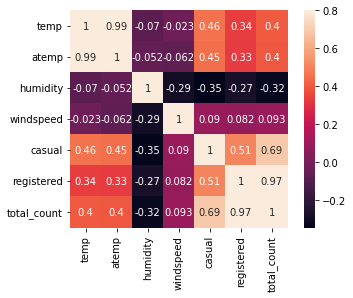

In [ ]:
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            # mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
)

In [31]:
# Import sklearn 
import sklearn.preprocessing as preprocessing
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [32]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(bike_data.iloc[:,0:-3],
                                        bike_data.iloc[:,-1],
                                        test_size=0.33,
                                        random_state=170)
X.reset_index(inplace=True)
y = y.reset_index()

In [33]:
X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [34]:
# Encoding all the categorical features
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [35]:
# Training dataset

encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

Train dataset shape::(11643, 19)
   temp  humidity  windspeed  hour  weekday  month  year  season_1  season_2  \
0  0.30      0.49     0.3881    23        3     12     1       0.0       0.0   
1  0.52      0.88     0.1045     4        4     10     1       0.0       0.0   
2  0.72      0.62     0.1045    15        5      5     1       0.0       1.0   
3  0.24      0.35     0.3582     8        2      3     0       0.0       1.0   
4  0.62      0.94     0.1642     4        5      9     0       0.0       0.0   

   season_3  season_4  is_holiday_0  is_holiday_1  weather_condition_1  \
0       0.0       1.0           1.0           0.0                  1.0   
1       0.0       1.0           1.0           0.0                  0.0   
2       0.0       0.0           1.0           0.0                  0.0   
3       0.0       0.0           1.0           0.0                  1.0   
4       1.0       0.0           1.0           0.0                  0.0   

   weather_condition_2  weather_condition

In [38]:
# Test dataset

test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Test dataset shape::(5736, 19)
   temp  humidity  windspeed  hour  weekday  month  year  season_1  season_2  \
0  0.36      0.40     0.0000    11        6     11     0       0.0       0.0   
1  0.22      0.69     0.1343     4        5      1     1       1.0       0.0   
2  0.70      0.58     0.1045     9        5      8     1       0.0       0.0   
3  0.76      0.66     0.2537    17        2      8     1       0.0       0.0   
4  0.52      0.88     0.1642    12        5     10     0       0.0       0.0   

   season_3  season_4  is_holiday_0  is_holiday_1  weather_condition_1  \
0       0.0       1.0           1.0           0.0                  1.0   
1       0.0       0.0           1.0           0.0                  1.0   
2       1.0       0.0           1.0           0.0                  1.0   
3       1.0       0.0           1.0           0.0                  0.0   
4       0.0       1.0           1.0           0.0                  0.0   

   weather_condition_2  weather_condition_3

In [39]:
# subsetting dataset to acquire important variables only 

from matplotlib import pyplot as plt
import seaborn as sns
bike_data_sub = bike_data[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'total_count']]

In [40]:
# visualizing dataframe

bike_data_sub.head()

,temp,atemp,humidity,windspeed,casual,registered,total_count
0,0.24,0.2879,0.81,0.0,3,13,16
1,0.22,0.2727,0.80,0.0,8,32,40
2,0.22,0.2727,0.80,0.0,5,27,32
3,0.24,0.2879,0.75,0.0,3,10,13
4,0.24,0.2879,0.75,0.0,0,1,1


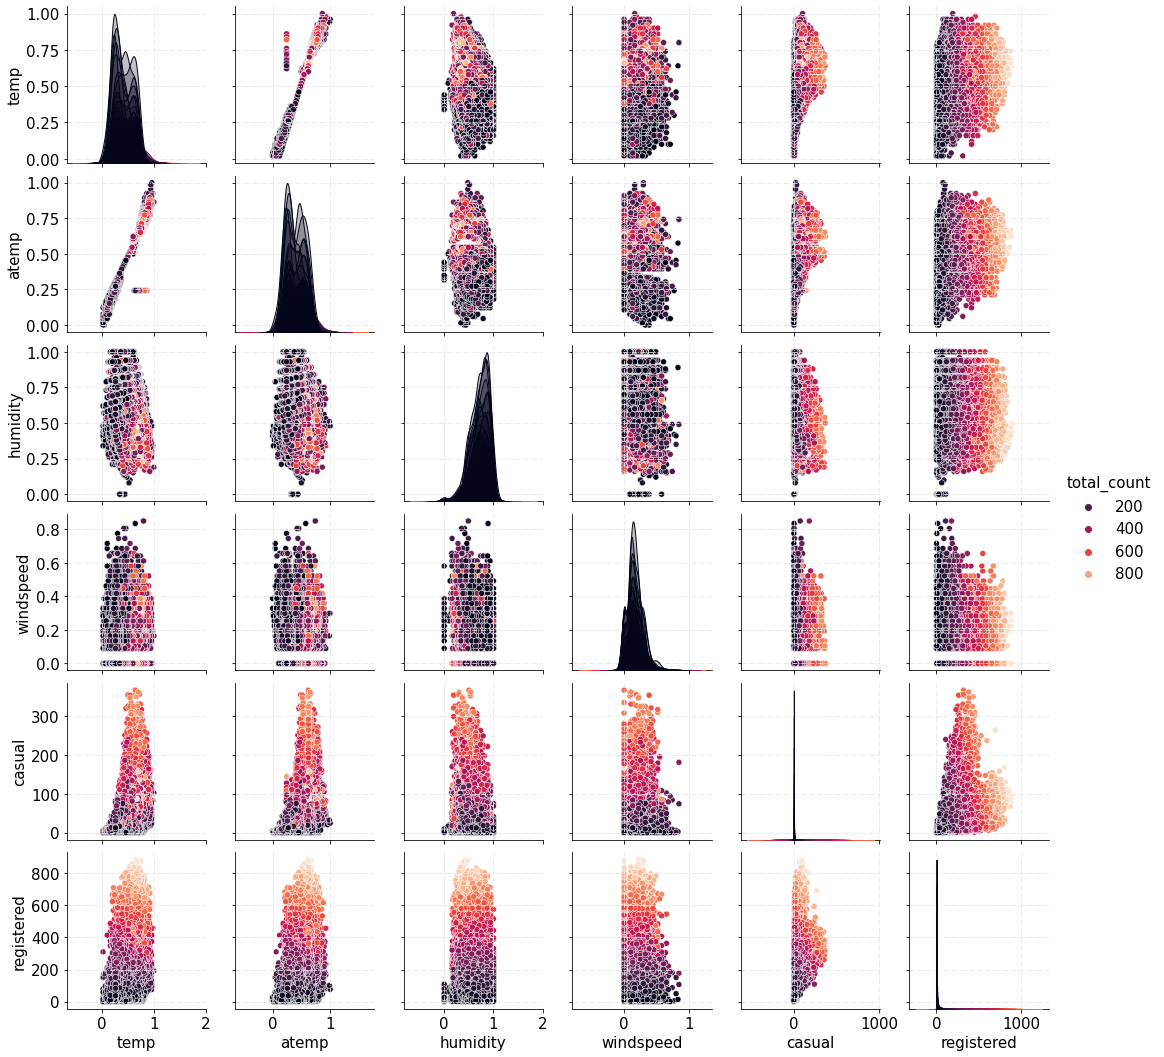

In [41]:
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
       'axes.grid' : True,
       'grid.color': '.9',
       'grid.linestyle':'-.',
       'font.family':'Times New Roman',
       'font.size' : 15}
plt.rcParams.update(rc)
sns.pairplot(bike_data_sub,hue="total_count",palette="rocket")

In [42]:
# scatterplot matrix

import plotly.express as px

fig = px.scatter_matrix(bike_data_sub, color='total_count')
fig.update_layout(
    title='Bike Sharing Dataset',
    dragmode='select',
    width=500,
    height=500,
    hovermode='closest',
)
fig.show()

In [43]:
# loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor

In [44]:
# Define categorical features
cat_attribs = bike_data[['season','is_holiday','weekday','weather_condition','is_workingday','month','year','hour']]
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

In [45]:
# defining base models

def base_models():
  models = dict()
  models['lr'] = LinearRegression()
  models["Ridge"] = Ridge()
  models["Lasso"] = Lasso()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
  models["GBM"] = GradientBoostingRegressor()
  models["LightGBM"] = LGBMRegressor()
  return models

# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=170)
  scores = -cross_val_score(model, train_df_new, y['total_count'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [46]:
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))


regressmod = pd.DataFrame(np.transpose(results), columns = ["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM", "LightGBM"])
regressmod = pd.melt(regressmod.reset_index(), id_vars='index',value_vars=["lr","Ridge","Lasso","Tree","Random Forest","Bagging","GBM", "LightGBM"])

>lr 104.878 (2.718)
>Ridge 104.871 (2.716)
>Lasso 104.735 (2.620)
>Tree 36.008 (1.255)
>Random Forest 26.648 (1.109)
>Bagging 28.152 (1.079)
>GBM 49.310 (1.819)
>LightGBM 26.752 (1.006)


In [49]:
# box plot

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(regressmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Machine Learning Model Performance")
fig.show()

In [50]:
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('Tree', DecisionTreeRegressor()))
  level0.append(('RF', RandomForestRegressor()))
  level0.append(('Bagging', BaggingRegressor()))
  level0.append(('GBM', GradientBoostingRegressor()))
	# define meta learner model
  level1 = LGBMRegressor()
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

def base_models():
  models = dict()
  models["Tree"] = DecisionTreeRegressor()
  models["Random Forest"] = RandomForestRegressor()
  models["Bagging"] = BaggingRegressor()
#   models["XGB"] = XGBRegressor()
  models["Stacked Model"] = get_stacking()
  return models

def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = -cross_val_score(model, train_df_new, y['total_count'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [51]:
models = base_models()
# evaluate the models and store results
results, names = list(), list() 

for name, model in models.items():
  scores = eval_models(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>Tree 36.135 (1.331)
>Random Forest 26.699 (0.917)
>Bagging 28.119 (0.957)
>Stacked Model 27.340 (0.929)


In [52]:
# box plot for all methods to measure performance

regressmod1 = pd.DataFrame(np.transpose(results), columns = ["Tree","Random Forest","Bagging","Stacked Reg"])
regressmod1 = pd.melt(regressmod1.reset_index(), id_vars='index',value_vars=["Tree","Random Forest","Bagging","Stacked Reg"])
fig = px.box(regressmod1, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "RMS Error"
        },title="Model Performance")
fig.show()
# fig.write_image("Boxplot-candidate.jpeg",engine="kaleido",format="png", width=1600, height=700, scale=0.75)
fig.show()

In [53]:
# creating pickle file which can be used for app deployment

import pickle

level0 = list()
level0.append(('Tree', DecisionTreeRegressor()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('GBM', GradientBoostingRegressor()))
level0.append(('Bagging', BaggingRegressor()))

level1 = LGBMRegressor()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
model.fit(train_df_new, y['total_count'])

# Save to file in the current working directory
pkl_filename = "AssignmentPickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [54]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [55]:
# It is a regression problem, so we will use the data below.
# train_df_new, test_df_new, y, y_test

score = pickle_model.score(test_df_new, y_test['total_count'])
print("Test score: {0:.2f} %".format(100 * score))
Y_predict = pickle_model.predict(test_df_new)

Test score: 94.18 %


Text(0.5, 1.0, 'Predicted vs Actual')

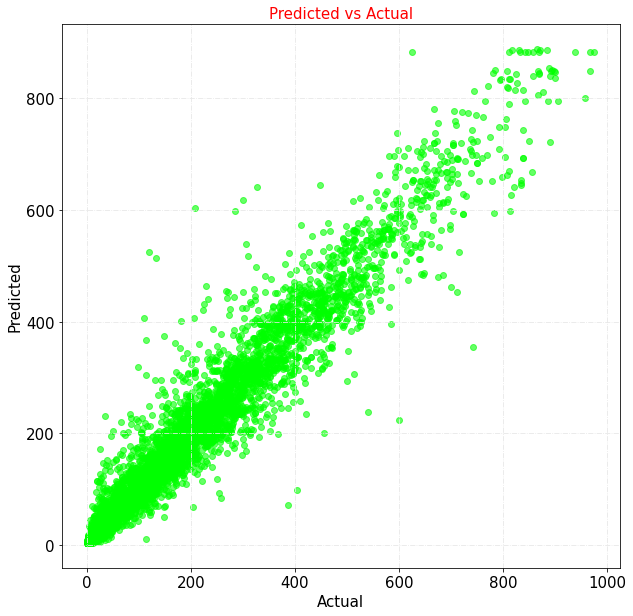

In [59]:
# plotting actual vs predicted values to measure performance

import matplotlib.pyplot as plt
import seaborn as sns

predictions = pd.DataFrame(Y_predict, columns=['predictions'])
predictions['actual'] = y_test['total_count']
plt.scatter(x = y_test['total_count'], y = Y_predict, color='#00FF00',alpha=0.6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual', fontsize=15, color='red',loc='center')